<a href="https://colab.research.google.com/github/Shankar-Pankhania/Twitter_Sentiment_Analysis_on_Bitcoin/blob/main/Preprocess_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to Google Drive

In [4]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Dissertation/


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Dissertation


Import Packages

In [5]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download("popular")

Read Dataset

In [7]:
df = pd.read_csv('bitcoin_tweets.csv')

Stopwords

In [8]:
# Global Parameter
stop_words = set(stopwords.words('english'))

This function handles emoji classifications

In [9]:
def emoji(tweets):
    # Smile
    tweets = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweets)
    # Laugh
    tweets = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweets)
    # Love
    tweets = re.sub(r'(<3|:\*)', ' positiveemoji ', tweets)
    # Wink
    tweets = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweets)
    # Sad
    tweets = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweets)
    # Cry
    tweets = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweets)
    return tweets

This function will preprocess the tweets without including stop words

In [7]:
#The code below has been commented out because we will be using stop words for this sentiment analysis. If you would like to check, please uncomment the code and comment the process_tweet function for stop words and run the whole code again.

#def process_tweet(tweets):
#    tweets = tweets.lower()                                             # Lowercases the string
#    tweets = re.sub(r'\@\w+|\#','', tweets)                             # Remove user @ references and '#' from tweets
#    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweets)   # Remove URLs
#    tweets = re.sub(r"\d+", " ", str(tweets))                           # Removes all digits
#    tweets = re.sub('&quot;'," ", tweets)                               # Remove (&quot;) 
#    tweets = emoji(tweets)                                              # Replaces Emojis
#    tweets = re.sub(r"\b[a-zA-Z]\b", "", str(tweets))                   # Removes all single characters
#    tweets = re.sub(r"[^\w\s]", " ", str(tweets))                       # Removes all punctuations
#    tweets = re.sub(r'(.)\1+', r'\1\1', tweets)                         # Convert more than 2 letter repetitions to 2 letter
#    tweets = re.sub(r"\s+", " ", str(tweets))                           # Replaces double spaces with single space   
#    return tweets                            

This function will preprocess the tweet including stop words

In [10]:
def process_tweet(tweets):
    tweets = tweets.lower()                                             # Lowercases the string
    tweets = re.sub(r'\@\w+|\#','', tweets)                             # Remove user @ references and '#' from tweets
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweets)   # Remove URLs
    tweets = re.sub(r"\d+", " ", str(tweets))                           # Removes all digits
    tweets = re.sub('&quot;'," ", tweets)                               # Remove (&quot;) 
    tweets = emoji(tweets)                                              # Replaces Emojis
    tweets = re.sub(r"\b[a-zA-Z]\b", "", str(tweets))                   # Removes all single characters
    tweets = re.sub(r"[^\w\s]", " ", str(tweets))                       # Removes all punctuations
    tweets = re.sub(r'(.)\1+', r'\1\1', tweets)                         # Convert more than 2 letter repetitions to 2 letter
    tweets = re.sub(r"\s+", " ", str(tweets))                           # Replaces double spaces with single space   
    tweet_tokens = word_tokenize(tweets)                                # Removes stopwords 
    filtered_words = [w for w in tweet_tokens if not w in stop_words] 
    return " ".join(filtered_words)     

Comparison of processed tweets vs original tweets

In [14]:
df['processed_tweet'] = np.vectorize(process_tweet)(df['Text'])
df[['processed_tweet','Text']]

,processed_tweet,Text
0,coindesk bitcoin currency world scaramucci qui...,"b""CoinDesk: Will Bitcoin Be the Currency of th..."
1,bitcoin life club strive help many become owne...,b'Bitcoin Life Club strive to help as many as ...
2,bitcoin ncurrent price xe xac ncryptocurrencie...,b'#Bitcoin\nCurrent Price:\n$ 58126.19\n\xe2\x...
3,purchase bitcoin coinmama paybis xe glad show ...,b'@MarekZee You can purchase bitcoin at Coinma...
4,investing optimal crypto portfolio cash past h...,b'#Investing 74.7% in this optimal #crypto por...
...,...,...
118590,bitcoin money dollars use today,b'#Bitcoin is more money than the dollars I us...
118591,basically thought scam like rest bitcoin accou...,b'@eNCA I basically thought @Ericwalker01 was...
118592,soo everyone bags bitcoin cryptocurrencies,"b""Soooo... How are everyone's bags doing? #Bit..."
118593,new working home bitcoin trading options nhere...,"b""@TheAtlantic @KatherineJWu For all those who..."



Tokenization

In [15]:
tokenized_tweets = df['processed_tweet'].apply(lambda x: x.split())
tokenized_tweets

0         [coindesk, bitcoin, currency, world, scaramucc...
1         [bitcoin, life, club, strive, help, many, beco...
2         [bitcoin, ncurrent, price, xe, xac, ncryptocur...
3         [purchase, bitcoin, coinmama, paybis, xe, glad...
4         [investing, optimal, crypto, portfolio, cash, ...
                                ...                        
118590                [bitcoin, money, dollars, use, today]
118591    [basically, thought, scam, like, rest, bitcoin...
118592     [soo, everyone, bags, bitcoin, cryptocurrencies]
118593    [new, working, home, bitcoin, trading, options...
118594             [xe, know, bitcoin, puddle, sure, dance]
Name: processed_tweet, Length: 118595, dtype: object

Lemmatization

In [16]:
lemmatizer = WordNetLemmatizer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

Stemming

In [ ]:
#The code below has been commented out because we will be using Lemmatization instead of Stemming for this sentiment analysis.

##stemmer = PorterStemmer()

#tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
#tokenized_tweets.head()

VADER 

In [ ]:
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

Generate sentiment polarity for each tweet

In [19]:
df['scores'] = df['processed_tweet'].apply(lambda Description: sid.polarity_scores(Description))

Generate a compound value and a sentiment type for each tweet

In [22]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment']=''
df.loc[df.compound>0,'sentiment']=1       #positive sentiment
df.loc[df.compound==0,'sentiment']=0      #neutral sentiment
df.loc[df.compound<0,'sentiment']=-1      #negative sentiment

Plot the sentiment classifications

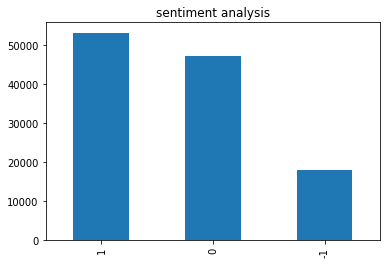

In [21]:
df.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

Download the CSV file

In [14]:
from google.colab import files
df.to_csv('bitcoin_tweets.csv')
files.download('bitcoin_tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>